In [70]:
from eda_module import Preprocessing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report

from pretty_confusion_matrix import pp_matrix_from_data
from imblearn.under_sampling import RandomUnderSampler




In [ ]:
#initialze classes, constansts and variables
COLORS = sns.color_palette('bright')[0:5]
DATASET = pd.read_csv('heart_failure_clinical_records_dataset.csv')
preprocessor = Preprocessing(DATASET)

#check for missing value and repair it if present
missing_data_removed_Dataset = preprocessor.check_missing_value()

#show descriptive statistics of the dataset, including mean median skewness and kurtosis
preprocessor.descriptives(missing_data_removed_Dataset)

# exploratory data analysis using visualizations
#countplot distribution of death event
sns.countplot(x='DEATH_EVENT', data=missing_data_removed_Dataset)
plt.show()

#boxplot distribution Death Event in respect to diabetes and age
sns.boxplot(x='diabetes', y='age', hue='DEATH_EVENT', data=missing_data_removed_Dataset)
plt.show()

sns.catplot(x='DEATH_EVENT', y='ejection_fraction', data=missing_data_removed_Dataset, kind='box')
plt.show()

plt.pie(missing_data_removed_Dataset['diabetes'].value_counts(), colors=COLORS, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()




In [ ]:
#Classification I
#split the dataset into training and test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(missing_data_removed_Dataset.drop('DEATH_EVENT', axis=1), missing_data_removed_Dataset['DEATH_EVENT'], test_size=0.2, random_state=42)

#Fitting Maching Learning Models
## Support Vector Machine
Support_vector_machine = SVC(C = .1, kernel='linear', random_state=42)
Support_vector_machine.fit(X_Train, Y_Train)

## Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_Train, Y_Train)

## Naive Bayes
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_Train, Y_Train)

## Logistic Regression
Logistic_Regression = LogisticRegression(random_state=42)
Logistic_Regression.fit(X_Train, Y_Train)


##Knearst Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_Train, Y_Train)

## Multi Layer Perceptron
Multi_layer_perceptron = MLPClassifier(hidden_layer_sizes=(6,5),
                    verbose=False,
                    learning_rate_init=0.01)
Multi_layer_perceptron.fit(X_Train, Y_Train)

print('All Models have been fitted successfully')


#Evaluating models
predicted_naives_bayes_classifier = Naive_Bayes.predict(X_Test)
predicted_support_vector_machine = Support_vector_machine.predict(X_Test)
predicted_random_forest_classifier = random_forest_classifier.predict(X_Test)
predicted_logistic_regression = Logistic_Regression.predict(X_Test)
predicted_multi_layer_perceptron = Multi_layer_perceptron.predict(X_Test)
predicted_knn_model = Knn_model.predict(X_Test)

In [ ]:
#plotting confusion matrix for all models
pp_matrix_from_data(Y_Test, predicted_naives_bayes_classifier) # type: ignore
pp_matrix_from_data(Y_Test, predicted_support_vector_machine) # type: ignore
pp_matrix_from_data(Y_Test, predicted_logistic_regression) # type: ignore
pp_matrix_from_data(Y_Test, predicted_random_forest_classifier) # type: ignore
pp_matrix_from_data(Y_Test, predicted_multi_layer_perceptron) # type: ignore
pp_matrix_from_data(Y_Test, predicted_knn_model) # type: ignore

#showing performance for all models in terms of accuracy,presicion, recall and f1 score by using a classification report
print("Classification-Report-Naive-Bayes \n",classification_report(Y_Test, predicted_naives_bayes_classifier))
print("Classification-Report-SVM \n",classification_report(Y_Test, predicted_support_vector_machine))
print("Classification-Report-Logistic-Regression \n",classification_report(Y_Test, predicted_logistic_regression))
print("Classification-Report-Random-Forest-Classifier \n",classification_report(Y_Test, predicted_random_forest_classifier, zero_division=0)) # type: ignore
print("Classification-Report-MLP \n",classification_report(Y_Test, predicted_multi_layer_perceptron, zero_division=0)) # type: ignore
print("Classification-Report-KNN \n",classification_report(Y_Test, predicted_knn_model)) # type: ignore

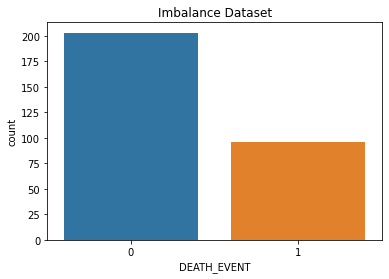

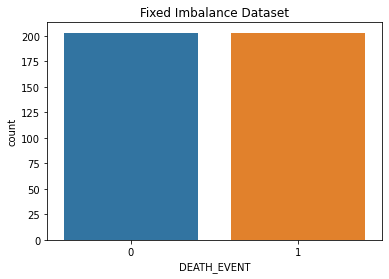

In [91]:
                                    #Classification II
#checking class imbalance problem
sns.countplot(x='DEATH_EVENT', data=missing_data_removed_Dataset).set(title='Imbalance Dataset')
plt.show()
                                    #Fixing class imbalance problem
######sampling technique (Oversampling)
#divinding to classes
death_event_true = missing_data_removed_Dataset[missing_data_removed_Dataset['DEATH_EVENT'] == 1]
death_event_false = missing_data_removed_Dataset[missing_data_removed_Dataset['DEATH_EVENT'] == 0]
# print(death_event_false)

#random oversampling
class_death_event_true_increase = death_event_true.sample(death_event_false.shape[0], replace=True)
fixed_imbalance_dataset = pd.concat([death_event_false, class_death_event_true_increase], axis=0)
sns.countplot(x='DEATH_EVENT', data=fixed_imbalance_dataset).set(title='Fixed Imbalance Dataset')
plt.show()

